<a href="https://colab.research.google.com/github/mandheer/data-science/blob/release%2Fsem_2_machine_learning/Group_101_ML_Assignment_PS3_Final_29_Aug_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ML Assignment - Group 101
2020fa04037 - Saurabh Pramanick
2020FC04265 - Mandheer Pabreja
2020fc04899 - Jatin Bhatia

---



---


**Introduction:**
Prepare a jupyter notebook (recommended - Google Colab) to build, train and evaluate a Machine Learning model on the given dataset. Please read the instructions carefully.

Part A (13 marks)
Dataset - https://drive.google.com/file/d/1F7kSOWXJKeZX44NXCXhwysfWT5wXfxSP/view?usp=sharing 
Consider the dataset of COVID-19 . The data is a collection of number of cases (positive, recovered, died) per day per geographical area recorded for the response of COVID- 19 .Prepare a jupyter notebook (recommended - Google Colab) to build, train and evaluate a Machine Learning model on the given dataset. Please read the instructions carefully.


1.	Import Libraries/Dataset 

In [ ]:
#1.b  Import the required libraries
import pandas as pd
import numpy as np
import sklearn as sk
import io
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.externals import joblib
sns.set(color_codes=True)
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#1.a import the dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['covid_dataset.csv']))
df2 = pd.read_csv(io.BytesIO(uploaded['covid_dataset.csv']))
df3 = pd.read_csv(io.BytesIO(uploaded['covid_dataset.csv']))
df4 = pd.read_csv(io.BytesIO(uploaded['covid_dataset.csv']))

Saving covid_dataset.csv to covid_dataset.csv


#2.	Data Visualization and Exploration

In [ ]:
df

,Date,Country,Confirmed,Recovered,Deaths
0,01-05-2020,India,37257,10007,1223
1,02-05-2020,India,39699,10819,1323
2,03-05-2020,India,42505,11775,1391
3,04-05-2020,India,46437,12847,1566
4,05-05-2020,India,49400,14142,1693
...,...,...,...,...,...
145,23-09-2020,India,5732518,4674987,91149
146,24-09-2020,India,5818570,4756164,92290
147,25-09-2020,India,5903932,4849584,93379
148,26-09-2020,India,5992532,4941627,94503


In [ ]:
#2.a.	Print at least 5 rows for sanity check to identify all the features present in the dataset and if the target matches with them
df.head(5)

,Date,Country,Confirmed,Recovered,Deaths
0,01-05-2020,India,37257,10007,1223
1,02-05-2020,India,39699,10819,1323
2,03-05-2020,India,42505,11775,1391
3,04-05-2020,India,46437,12847,1566
4,05-05-2020,India,49400,14142,1693


In [ ]:
print(df.head())

         Date Country  Confirmed  Recovered  Deaths
0  01-05-2020   India      37257      10007    1223
1  02-05-2020   India      39699      10819    1323
2  03-05-2020   India      42505      11775    1391
3  04-05-2020   India      46437      12847    1566
4  05-05-2020   India      49400      14142    1693


In [ ]:
df.info() # output shown below

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       150 non-null    object
 1   Country    150 non-null    object
 2   Confirmed  150 non-null    int64 
 3   Recovered  150 non-null    int64 
 4   Deaths     150 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.0+ KB


           Confirmed  Recovered    Deaths
Confirmed   1.000000   0.998427  0.992595
Recovered   0.998427   1.000000  0.984933
Deaths      0.992595   0.984933  1.000000


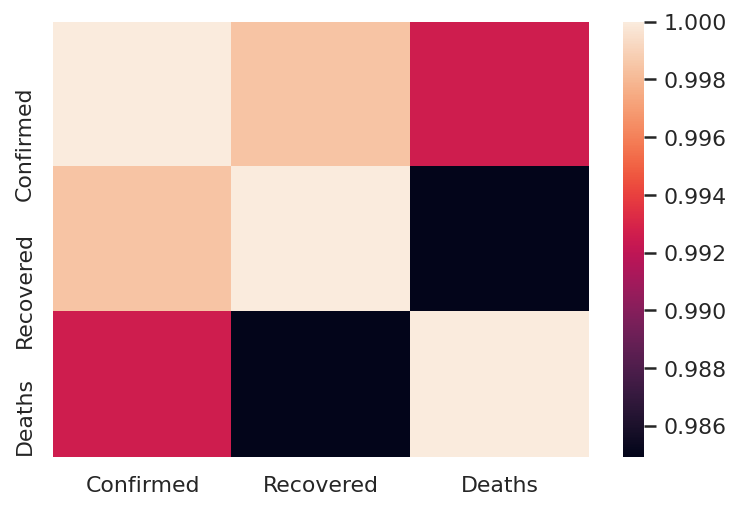

In [ ]:
corr = df.corr()
print(corr)
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

In [ ]:
#2.b.	Print the shape, size and dimension of the dataset
shape = df.shape
size = df.size
dim = df.ndim
print('DataFrame Shape :', shape)
print('Number of rows :', shape[0])
print('Number of columns :', shape[1])
print('DataFrame Size :', size)
print('DataFrame dimension :', dim)

DataFrame Shape : (150, 5)
Number of rows : 150
Number of columns : 5
DataFrame Size : 750
DataFrame dimension : 2


In [ ]:
df.dtypes

Date         object
Country      object
Confirmed     int64
Recovered     int64
Deaths        int64
dtype: object

In [ ]:
#2.b.	Print the description and shape of the dataset
desc = df.describe() #Including only numeric columns in a DataFrame description.
print(desc)

          Confirmed     Recovered        Deaths
count  1.500000e+02  1.500000e+02    150.000000
mean   1.750494e+06  1.290402e+06  33359.660000
std    1.798908e+06  1.453387e+06  28539.647903
min    3.725700e+04  1.000700e+04   1223.000000
25%    2.595965e+05  1.251598e+05   7273.500000
50%    9.525190e+05  6.024000e+05  24611.500000
75%    2.958232e+06  2.206669e+06  55557.750000
max    5.992532e+06  4.941627e+06  94503.000000


**Boxplot**

From the statistical summaries produced by data.describe() in the above, we only draw the boxplots  in a single plot using the following one-liner code. The method we use is plot.box.

If we want the boxplot to become horizontal, instead of vertical as in the above we want to have an additional plot grid to help us see more precisely the essential parts of the plots, such as the median, outlier boundaries, etc. No problem, we can do that by setting the parameter vert = False and grid = True.

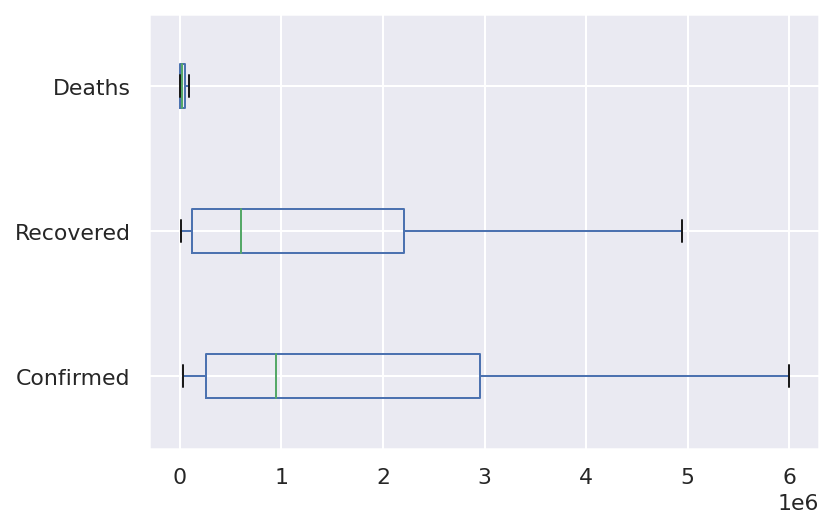

In [ ]:
df[['Confirmed','Recovered','Deaths']].plot.box(vert = False, grid = True)

**Histogram**

We draw a histogram for Confirmed column. The code is straightforward via plot.hist, with a required parameter for representing the number of bins we want to have in the histogram (here we choose 20).

Note that, we have utilized the self-named parameter (title)to produce the title on top of the histogram.

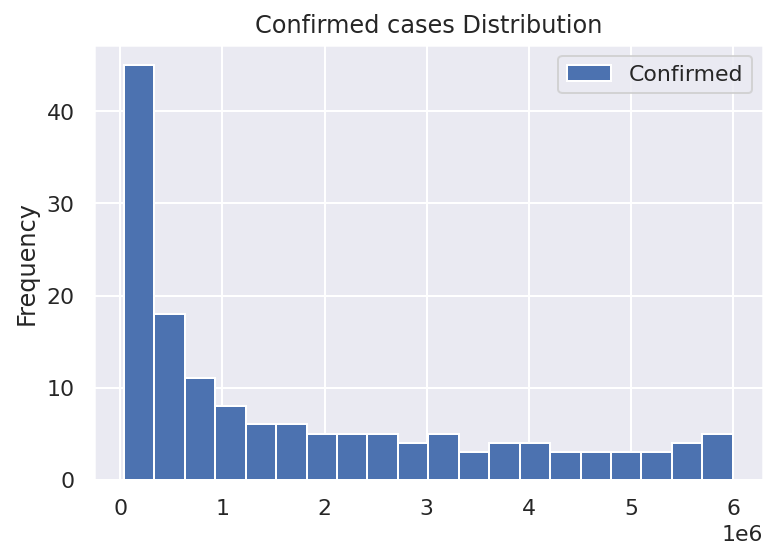

In [ ]:
df[['Confirmed']].plot.hist(bins = 20, title = 'Confirmed cases Distribution')

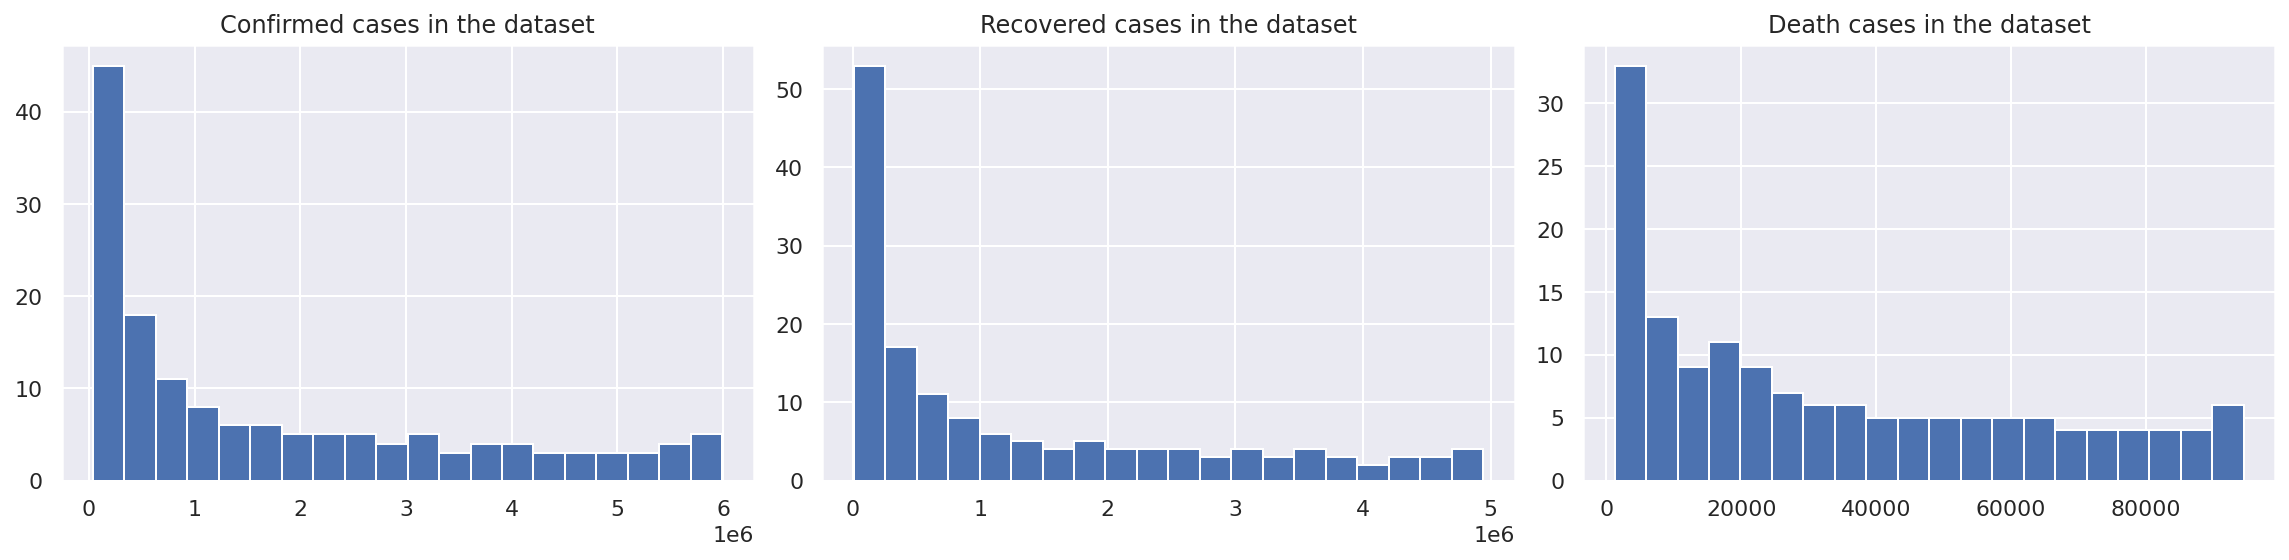

In [ ]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.hist(df['Confirmed'], bins = 20)
plt.title('Confirmed cases in the dataset')
plt.subplot(1,3,2)
plt.hist(df['Recovered'], bins = 20)
plt.title('Recovered cases in the dataset')
plt.subplot(1,3,3)
plt.hist(df['Deaths'], bins = 20)
plt.title('Death cases in the dataset')
plt.tight_layout()

**Correlation Matrix**

It is produced by a sub-functionality style.background_gradient from the corr object of a DataFrame.

We set the diverging color map theme parameter cmap=’coolwarm’ (other good alternatives include ‘RdBu_r’ and ‘BrBG’).

In [ ]:
#Correlation Matrix
corr = df[['Date','Confirmed','Recovered','Deaths']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Confirmed,Recovered,Deaths
Confirmed,1.00,1.00,0.99
Recovered,1.00,1.00,0.98
Deaths,0.99,0.98,1.00


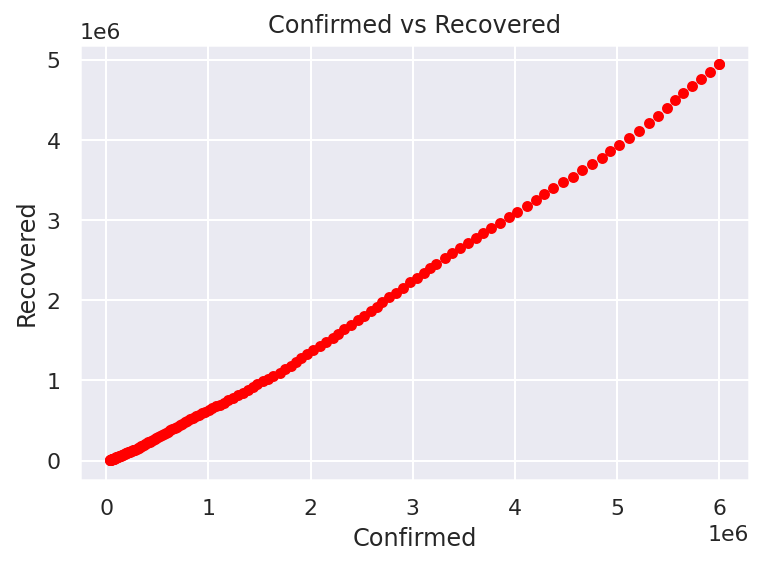

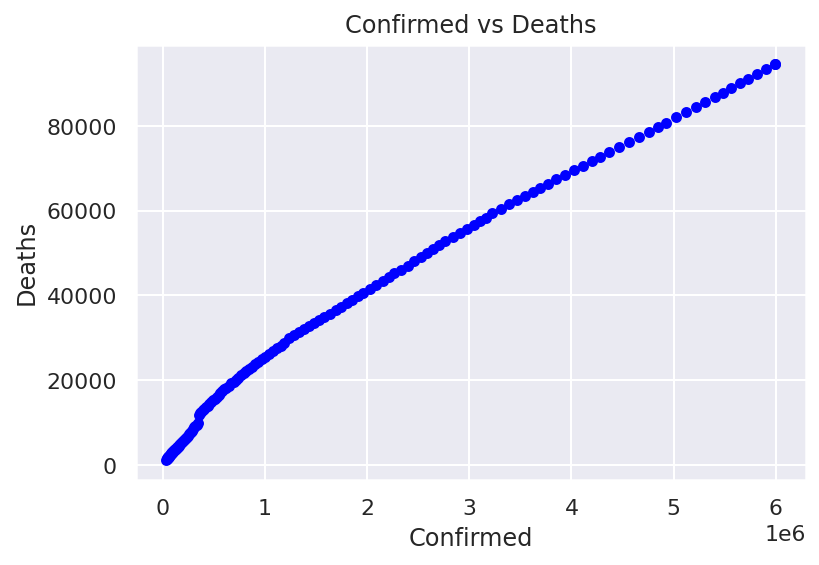

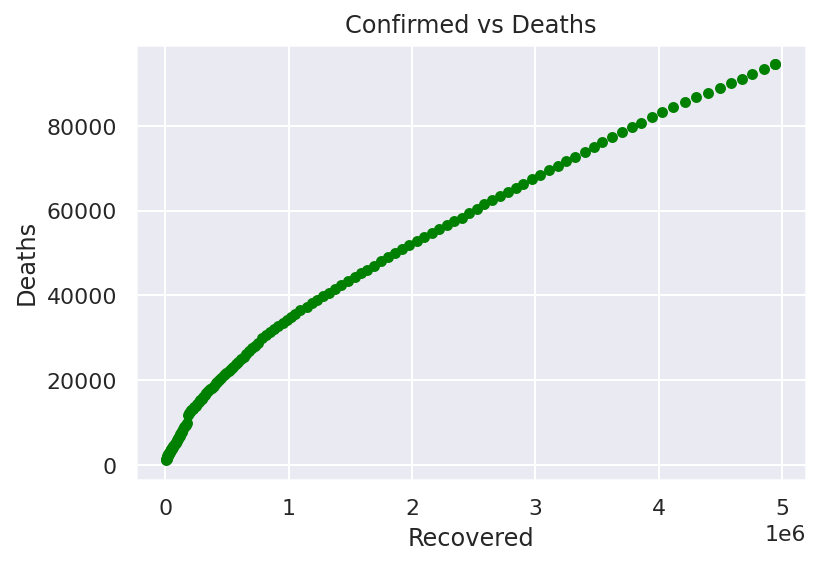

In [ ]:
df.plot.scatter(x = 'Confirmed', y = 'Recovered', color = 'Red', title = 'Confirmed vs Recovered')
#We can clearly see the positive correlation.
df.plot.scatter(x = 'Confirmed', y = 'Deaths', color = 'Blue', title = 'Confirmed vs Deaths')
df.plot.scatter(x = 'Recovered', y = 'Deaths', color = 'Green', title = 'Confirmed vs Deaths')

**Line Plot**



Here, we want to know how is the monthly cases of the total cases. 
To do so, we first have to construct a DataFrame with two columns: 
Similar to producing the bar chart above, we perform sum aggregation, grouped by column.

In [ ]:
df['Date'] = df['Date'].str[3:]

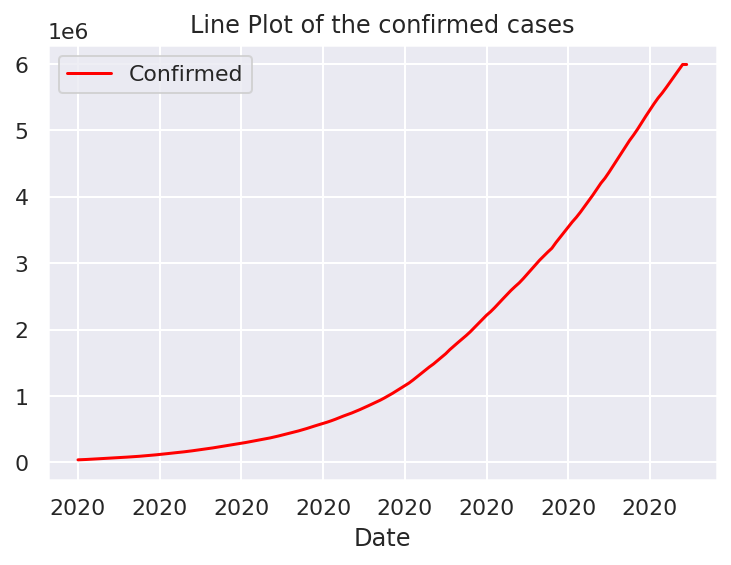

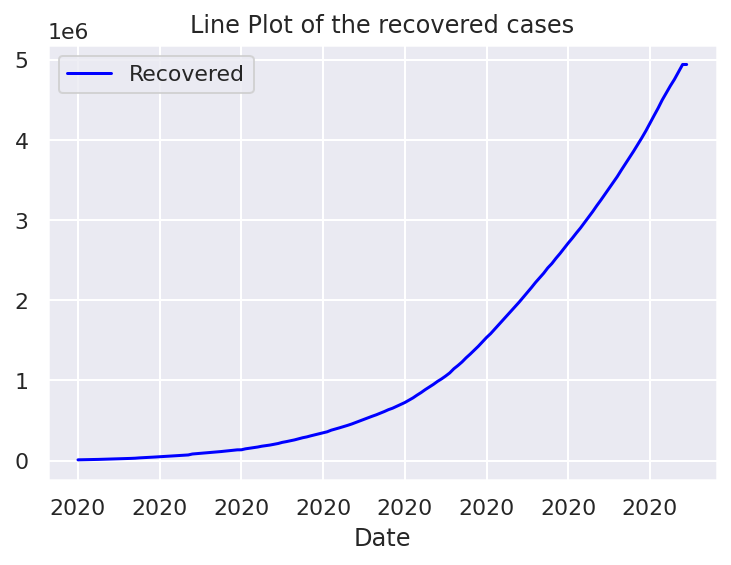

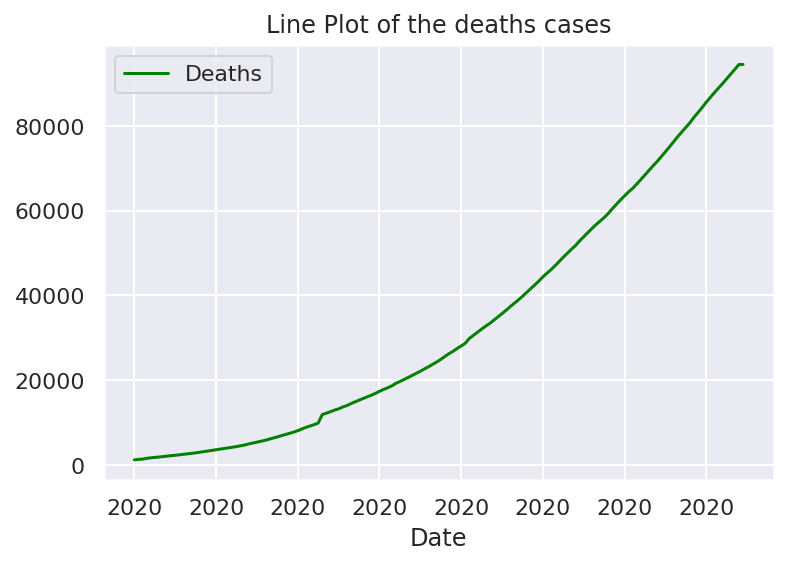

In [ ]:
df['Date'] = df['Date'].str[3:]
x1 = df['Confirmed']
x2 = df['Recovered']
x3 = df['Deaths']
df_conf = df[['Date','Confirmed']].groupby('Date').sum()
df_conf.reset_index(inplace = True)
df_rec = df[['Date','Recovered']].groupby('Date').sum()
df_rec.reset_index(inplace = True)
df_death = df[['Date','Deaths']].groupby('Date').sum()
df_death.reset_index(inplace = True)

#plt.plot(x1,x3,x2,x3)
ax = df.plot.line(x = 'Date', y = 'Confirmed', color = 'red', title = 'Line Plot of the confirmed cases')
bx = df.plot.line(x = 'Date', y = 'Recovered', color = 'blue', title = 'Line Plot of the recovered cases')
cx = df.plot.line(x = 'Date', y = 'Deaths', color = 'green', title = 'Line Plot of the deaths cases')
#ax = df_conf.plot.line(x = 'Date', y = 'Confirmed', color = 'lime')
#df_rec.plot.line(x = 'Date', y = 'Recovered', color = 'salmon', title = 'Day wise Confirmed vs Recovered', ax = ax)



#Data Aggregation

So far, all the Confirmed, Deaths, Recovered are existing data from raw CSV dataset. Let’s add an active cases column Active, which is calculated by

In [ ]:
full_table = df

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
full_table.isna().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [ ]:
full_table['Recovered'] = full_table['Recovered'].fillna(0)

So far, all the Confirmed, Deaths, Recovered are existing data from raw CSV dataset. Let’s add an active cases column Active, which is calculated by

In [ ]:
full_table['Active'] = full_table['Confirmed'] - full_table['Deaths'] - full_table['Recovered']
full_table

,Date,Country,Confirmed,Recovered,Deaths,Active
0,2020-01-01,India,37257,10007,1223,26027
1,2020-01-01,India,39699,10819,1323,27557
2,2020-01-01,India,42505,11775,1391,29339
3,2020-01-01,India,46437,12847,1566,32024
4,2020-01-01,India,49400,14142,1693,33565
...,...,...,...,...,...,...
145,2020-01-01,India,5732518,4674987,91149,966382
146,2020-01-01,India,5818570,4756164,92290,970116
147,2020-01-01,India,5903932,4849584,93379,960969
148,2020-01-01,India,5992532,4941627,94503,956402


sum() is to get the total count of ‘Confirmed’, ‘Deaths’, ‘Recovered’, ‘Active’ for the given Date and Country.
reset_index() reset the index and use the default one, which is Date and Country.

In [ ]:
full_grouped = full_table.groupby(['Date', 'Country'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
full_grouped

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Date,Country,Confirmed,Deaths,Recovered,Active
0,2020-01-01,India,262574045,5003949,193560294,64009802


Let’s add day wise New cases, New deaths and New recovered by deducting the corresponding accumulative data on the previous day.

In [ ]:
# new cases 
temp = full_grouped.groupby(['Country', 'Date', ])['Confirmed', 'Deaths', 'Recovered']
temp = temp.sum().diff().reset_index()
mask = temp['Country'] != temp['Country'].shift(1)
temp.loc[mask, 'Confirmed'] = np.nan
temp.loc[mask, 'Deaths'] = np.nan
temp.loc[mask, 'Recovered'] = np.nan
# renaming columns
temp.columns = ['Country', 'Date', 'New cases', 'New deaths', 'New recovered']
# merging new values
full_grouped = pd.merge(full_grouped, temp, on=['Country', 'Date'])
# filling na with 0
full_grouped = full_grouped.fillna(0)
# fixing data types
cols = ['New cases', 'New deaths', 'New recovered']
full_grouped[cols] = full_grouped[cols].astype('int')
# 
full_grouped['New cases'] = full_grouped['New cases'].apply(lambda x: 0 if x<0 else x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


#Data Exploration

For simplicity, let’s use Python Data Visualization library Altair to create some simple visualizations. Altair is a declarative statistical visualization library for Python, based on Vega and Vega-Lite. Altair offers a powerful and concise visualization grammar that enables you to build a wide range of statistical visualizations quickly.

Showing total and daily cases



In [ ]:
import pandas as pd
import altair as alt
full_grouped = df
uk = full_grouped[full_grouped['Country'] == 'India']

 Let’s create a base chart with the common elements. We can concatenate horizontally using the | operator

In [ ]:
base = alt.Chart(uk).mark_bar().encode(
    x='monthdate(Date):O',
).properties(
    width=500
)

In [ ]:
red = alt.value("#f54242")
base.encode(y='Confirmed').properties(title='Total confirmed') | base.encode(y='Deaths',color=red).properties(title='Total deaths')

alt.HConcatChart(...)

In [ ]:
import pandas as pd
import altair as alt
full_grouped = df
countries = ['India']
selected_countries = full_grouped[full_grouped['Country'].isin(countries)]

Let’s create a circle chart to display the day wise Active cases,

In [ ]:
alt.Chart(selected_countries).mark_circle().encode(
    x='monthdate(Date):O',
    y='Country',
    color='Country',
    size=alt.Size('Active:Q',
        scale=alt.Scale(range=[0, 1000]),
        legend=alt.Legend(title='Daily new cases')
    ) 
).properties(
    width=800,
    height=300
)

alt.Chart(...)

#Preprocessing

In [ ]:
cleaned_data = df
cleaned_data.head()

,Date,Country,Confirmed,Recovered,Deaths,Active
0,2020-01-01,India,37257,10007,1223,26027
1,2020-01-01,India,39699,10819,1323,27557
2,2020-01-01,India,42505,11775,1391,29339
3,2020-01-01,India,46437,12847,1566,32024
4,2020-01-01,India,49400,14142,1693,33565


In [ ]:
# cases 
cases = ['Confirmed', 'Deaths', 'Recovered']

In [ ]:
# filling missing values 
cleaned_data[['Confirmed']] = cleaned_data[['Confirmed']].fillna('')
cleaned_data[cases] = cleaned_data[cases].fillna(0)


In [ ]:
# Active Case = confirmed - deaths - recovered
cleaned_data['Active'] = cleaned_data['Confirmed'] - cleaned_data['Deaths'] - cleaned_data['Recovered']

cleaned_data.head()

,Date,Country,Confirmed,Recovered,Deaths,Active
0,2020-01-01,India,37257,10007,1223,26027
1,2020-01-01,India,39699,10819,1323,27557
2,2020-01-01,India,42505,11775,1391,29339
3,2020-01-01,India,46437,12847,1566,32024
4,2020-01-01,India,49400,14142,1693,33565


**Label Encoder**

In Machine Learning, We will have more than one category in the dataset that to convert those categories into numerical features we can use a Label encoder. Label Encoder will assign a unique number to each category.


In [ ]:
from sklearn.preprocessing import LabelEncoder,  OneHotEncoder
df['Active'].value_counts()

956402     2
960969     1
785996     1
707668     1
57939      1
          ..
411296     1
485277     1
29339      1
1017754    1
815538     1
Name: Active, Length: 149, dtype: int64

In [ ]:
le=LabelEncoder()
df['Active']=le.fit_transform(df['Active'])
df['Active'].value_counts()

133    2
148    1
46     1
52     1
51     1
      ..
98     1
97     1
96     1
95     1
0      1
Name: Active, Length: 149, dtype: int64

In [ ]:
le.classes_

array([  26027,   27557,   29339,   32024,   33565,   35871,   37686,
         39823,   41406,   43980,   45925,   47457,   49104,   51379,
         52773,   53553,   55878,   57939,   60864,   63172,   66089,
         69244,   73170,   76820,   80072,   82172,   85803,   85884,
         89706,   89755,   93349,   97008,  101077,  106665,  111900,
        116302,  120981,  126431,  129360,  133726,  141842,  143297,
        145779,  149348,  153106,  153178,  155227,  160384,  163248,
        168269,  169469,  174387,  178014,  183022,  186514,  189463,
        197387,  203051,  210120,  215125,  220169,  226947,  227439,
        235433,  244814,  253287,  259571,  264944,  269789,  276685,
        283407,  292231,  301609,  311565,  319840,  331175,  342473,
        359060,  373542,  390622,  402678,  411296,  426330,  440298,
        456234,  468002,  485277,  495499,  509447,  527273,  543680,
        565103,  567730,  579357,  586244,  586298,  595501,  607384,
        619088,  628

**One Hot encoder**

One hot encoder does the same things but in a different way. Though label encoding is straight but it has the disadvantage that the numeric values can be misinterpreted by algorithms as having some sort of hierarchy/order in them. This ordering issue is addressed in another common alternative approach called ‘One-Hot Encoding’. In this strategy, each category value is converted into a new column and assigned a 1 or 0 (notation for true/false) value to the column.

In [ ]:
one_hot = OneHotEncoder()
transformed_data = one_hot.fit_transform(df['Active'].values.reshape(-1,1)).toarray()
one_hot.categories_

[array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148])]

**Normalization**

Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
normalizer = MinMaxScaler()
df.dropna(axis=1,inplace = True) 


**Imputation of missing values**

Missing values are data that are not available in dataset. there can be single value can be missing or only on value is available and all others are missing.

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')

In [ ]:
df

,Date,Country,Confirmed,Recovered,Deaths,Active
0,2020-01-01,India,37257,10007,1223,0
1,2020-01-01,India,39699,10819,1323,1
2,2020-01-01,India,42505,11775,1391,2
3,2020-01-01,India,46437,12847,1566,3
4,2020-01-01,India,49400,14142,1693,4
...,...,...,...,...,...,...
145,2020-01-01,India,5732518,4674987,91149,136
146,2020-01-01,India,5818570,4756164,92290,138
147,2020-01-01,India,5903932,4849584,93379,135
148,2020-01-01,India,5992532,4941627,94503,133


In [ ]:
# Section 6 - Generating Colours and Style
colors = {'India':'#150'}
plt.style.use('fivethirtyeight')

**Feature Engineering**

---



---



In [ ]:
#Fixed – Width Binning
df_bin = df

#Creating bins and labels
bins = [20000,40000,60000,80000,100000,120000]
labels = ['Bin1','Bin2','Bin3','Bin4','Bin5']

df_bin['Active'] = pd.cut(df_bin['Active'],bins = bins,labels = labels)

In [ ]:
#Time-Series data

df_time = df
df['date'] = pd.to_datetime(df['Date'])
df['month'] = pd.DatetimeIndex(df['Date']).month 
df['year'] = pd.DatetimeIndex(df['Date']).year

In [ ]:
#Exponential Transformation

from sklearn.preprocessing import FunctionTransformer
#Load data
df_exp = df
#create column variables to hold the columns that needs transformation
columns = ['col1','col2','col3']
#create function transformer object
exp_trnsf = FunctionTransformer(lambda x:x**(3), validate=True)

In [ ]:
#Reciprocal Transformation
reciprocal_transfer = FunctionTransformer(np.reciprocal,validate=True)

In [ ]:
#Logarithmic Transformation
logarithmic_transfer = FunctionTransformer(np.log, validate = True)

In [ ]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [ ]:
# Load the dataset
#columns = "Confirmed Recovered Deaths Active".split() # Declare the columns names
covid = df # Call the diabetes dataset from sklearn
#df_dataset = pd.DataFrame(df.data, columns=columns) # load the dataset as a pandas data frame
#y = covid.target # define the target variable (dependent variable) as y
columns = "age sex bmi map tc ldl hdl tch ltg glu".split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y
diabetes

{'DESCR': '.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - Age\n      - Sex\n      - Body mass index\n      - Average blood pressure\n      - S1\n      - S2\n      - S3\n      - S4\n      - S5\n      - S6\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttps://www4.stat.ncsu.edu/~boos/var.select/

In [ ]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)


(353, 10) (353,)
(89, 10) (89,)


In [ ]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [ ]:
predictions[0:5]


array([176.77622917, 204.07916627,  60.11629742, 180.20610299,
        77.64377412])

Text(0, 0.5, 'Predictions')

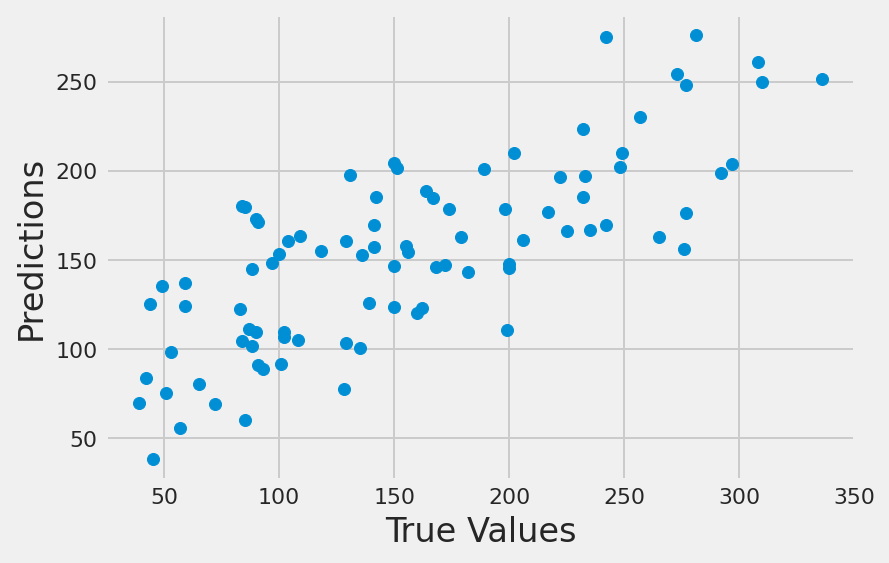

In [ ]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [ ]:
print ("Score:", model.score(X_test, y_test))

Score: 0.5814934682870352


#Cross Validation

In [ ]:
from sklearn.model_selection import KFold # import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([1, 2, 3, 4]) # Create another array
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=2, random_state=None, shuffle=False)

KFold(n_splits=2, random_state=None, shuffle=False)


KFold(n_splits=2, random_state=None, shuffle=False)

In [ ]:
for train_index, test_index in kf.split(X):
 print("TRAIN:", train_index, "TEST:", test_index)
 X_train, X_test = X[train_index], X[test_index]
 y_train, y_test = y[train_index], y[test_index]

TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


#Leave One Out Cross Validation (LOOCV)

In [ ]:
from sklearn.model_selection import LeaveOneOut 
X = np.array([[1, 2], [3, 4]])
y = np.array([1, 2])
loo = LeaveOneOut()
loo.get_n_splits(X)


for train_index, test_index in loo.split(X):
   print("TRAIN:", train_index, "TEST:", test_index)
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]
   print(X_train, X_test, y_train, y_test)

TRAIN: [1] TEST: [0]
[[3 4]] [[1 2]] [2] [1]
TRAIN: [0] TEST: [1]
[[1 2]] [[3 4]] [1] [2]


In [ ]:
# Necessary imports: 
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn import metrics

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sns 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
%matplotlib inline

In [ ]:
#1.a import the dataset
df = df2

In [ ]:
df

,Date,Country,Confirmed,Recovered,Deaths
0,01-05-2020,India,37257,10007,1223
1,02-05-2020,India,39699,10819,1323
2,03-05-2020,India,42505,11775,1391
3,04-05-2020,India,46437,12847,1566
4,05-05-2020,India,49400,14142,1693
...,...,...,...,...,...
145,23-09-2020,India,5732518,4674987,91149
146,24-09-2020,India,5818570,4756164,92290
147,25-09-2020,India,5903932,4849584,93379
148,26-09-2020,India,5992532,4941627,94503


In [ ]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,01-05-2020,India,37257,10007,1223
1,02-05-2020,India,39699,10819,1323
2,03-05-2020,India,42505,11775,1391
3,04-05-2020,India,46437,12847,1566
4,05-05-2020,India,49400,14142,1693


#**Manipulating and Cleaning our dataset**

In this section , we will attempt to clean our dataset from al zeros and missing values such as NaN , and replace them with the mean of the designated columns. We have decided to use a specific number of columns to do the cleaning as these subjected columns which are mentioned as following

In [ ]:
#cleaning the dataset  from missing values or zeros
#zeros or missing values will be replaced by the mean of that particular column
# this practice is the best practie to have a readable and consistent data values
data = pd.DataFrame(df)
cols_clean = ['Confirmed','Recovered','Deaths']
# with this function , i dealt with missing values and NaN values 
for i in cols_clean:
    data[i] = data[i].replace(0,np.NaN)
    cols_mean = int(data[i].mean(skipna=True))
    data[i] = data[i].replace(np.NaN, cols_mean)
data1 = data
data1.head().style.highlight_max(color="lightblue").highlight_min(color="red")

,Date,Country,Confirmed,Recovered,Deaths
0,01-05-2020,India,37257,10007,1223
1,02-05-2020,India,39699,10819,1323
2,03-05-2020,India,42505,11775,1391
3,04-05-2020,India,46437,12847,1566
4,05-05-2020,India,49400,14142,1693


In [ ]:
# Let's take a quick statistcal view of the data provided
print(data1.describe())

          Confirmed     Recovered        Deaths
count  1.500000e+02  1.500000e+02    150.000000
mean   1.750494e+06  1.290402e+06  33359.660000
std    1.798908e+06  1.453387e+06  28539.647903
min    3.725700e+04  1.000700e+04   1223.000000
25%    2.595965e+05  1.251598e+05   7273.500000
50%    9.525190e+05  6.024000e+05  24611.500000
75%    2.958232e+06  2.206669e+06  55557.750000
max    5.992532e+06  4.941627e+06  94503.000000


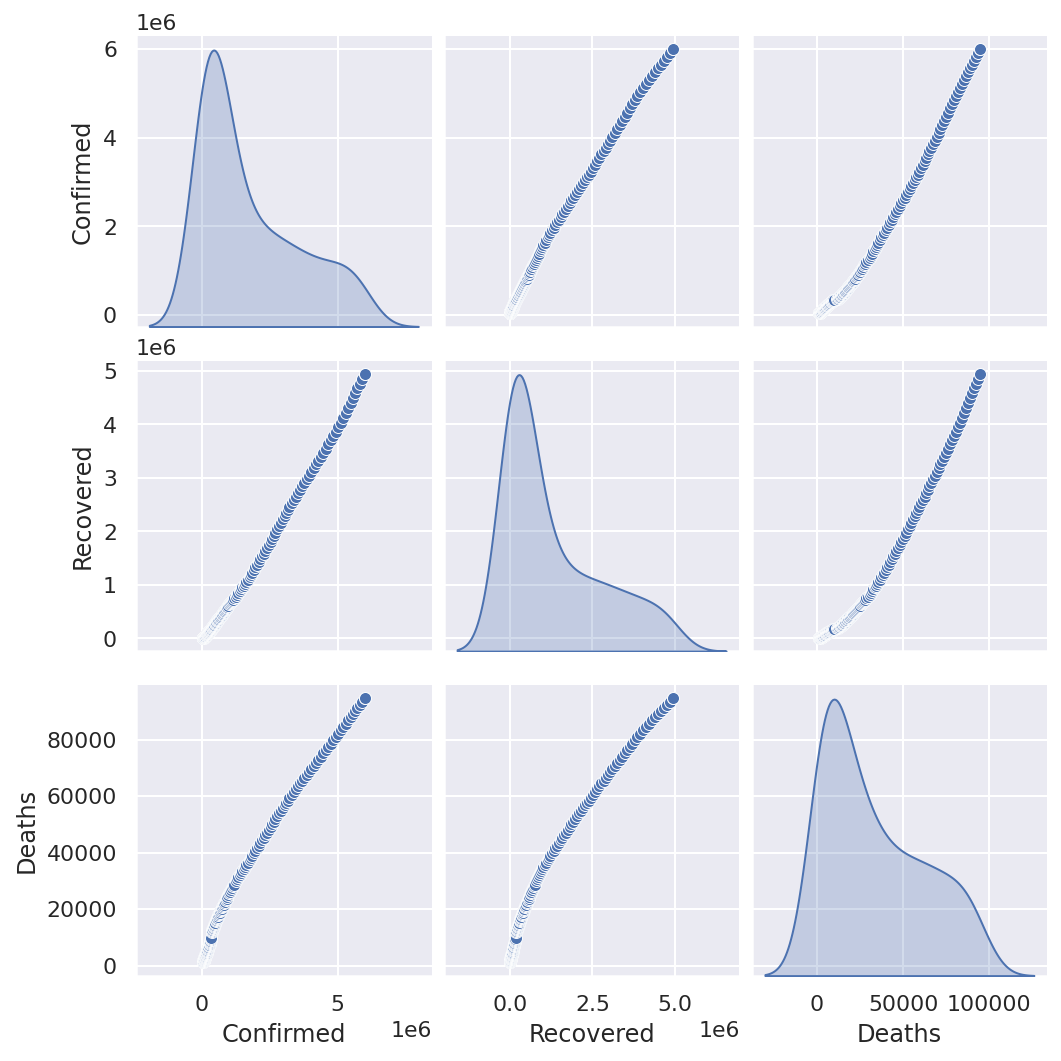

In [ ]:
#Plotting the dataset
#The updated dataset is ready for a basic plotting, in order to see how would our data looks like, also plotting at this stage will help me decide 
#which column we will choose to run a K-nearest neighbour (KNN) experiment. 
#For plotting we’ve used pairplot() function with the help of Seaborn library , that will give me a range of graph plotting for each group of data presented in the dataset .

graph = ['Confirmed','Recovered','Deaths']
sns.set()
print(sns.pairplot(data1[graph], diag_kind='kde'))


In [ ]:
# for the purpose of simplicity and analysing the most relevent  data , we will select three features of the dataset
q_cols = ['Confirmed','Recovered','Deaths']
# defining variables and features for the dataset for splitting 
df = data1[q_cols]
print(df.head(2))

   Confirmed  Recovered  Deaths
0      37257      10007    1223
1      39699      10819    1323


#**Splitting the dataset into training and testing dataset**

A particularly important part of machine learning modelling or preparing data for machine learning algorithms is splitting our dataset into training and testing datasets.

Mainly , datasets undergo a splitting process for the purpose of testing the model , the testing process will determine how accurate your machine learning algorithm in predicting every testing sets against training sets, and how that will take shape in the real world. Then , we take the presented data and compute the accuracy rate of the Machine learning algorithm. Ideally , the higher the accuracy rate of your machine learning algorithm the better is your model in predicting presented sample data.

In [ ]:

#Splitting the dataset into training and testing dataset

# let's split the data into training and testing datasets
df['Active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']
split = 0.75 # 75% train and 25% test dataset
total_len = len(df)
split_df = int(total_len*split)
train, test = df.iloc[:split_df,0:4],df.iloc[split_df:,0:4] 
train_x = train[['Confirmed','Recovered','Deaths']]
train_y = train['Active']
test_x = test[['Confirmed','Recovered','Deaths']]
test_y = test['Active']

We need to run a quick syntax to see if these data are split correctly

In [ ]:
a = len(train_x) 
b = len(test_x)
print(' Training data =',a,'\n','Testing data =',b,'\n','Total data length = ',a+b)

 Training data = 112 
 Testing data = 38 
 Total data length =  150


#**KNN function**

We wrote a function to populate the result of adopting KNN algorithm against the split data. This function will run the KNN algorithm K times and populate the result in a form of Lines plot .

In [ ]:
# let's test it using KNN  classifier with a loop to cover as much n-neightbors as possible 
def knn(x_train, y_train, x_test, y_test,n):
    n_range = range(1, n)
    results = []
    for n in n_range:
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(x_train, y_train)
        #Predict the response for test dataset
        predict_y = knn.predict(x_test)
        accuracy = metrics.accuracy_score(y_test, predict_y)
        #matrix = confusion_matrix(y_test,predict_y)
        #seaborn_matrix = sns.heatmap(matrix, annot = True, cmap="Blues",cbar=True)
        results.append(accuracy)
    return results

For this exercise , we will test and plot the model with K values from 1 up to 50 and see where are we with the best overall k values

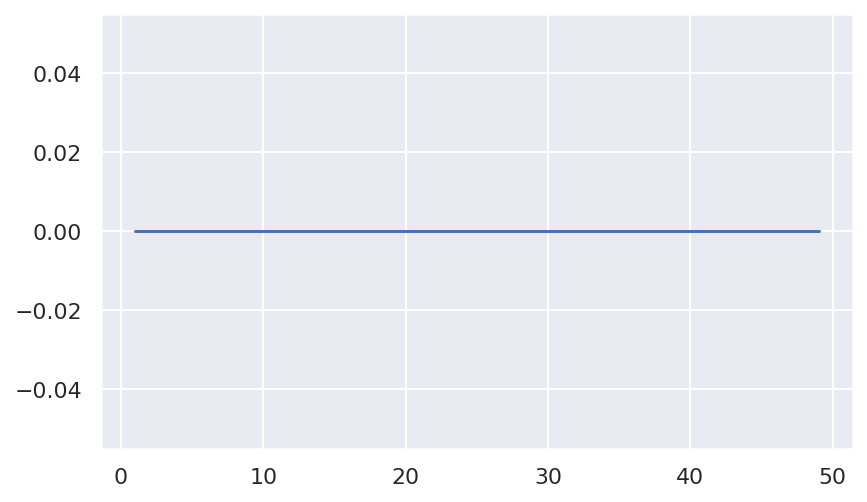

In [ ]:
n= 50
output = knn(train_x,train_y,test_x,test_y, n)
n_range = range(1, n)
plt.plot(n_range, output)

#**Forecasting Total Number of Cases** 

In this segment, we’re going to generate a week ahead forecast of confirmed cases of COVID-19 using Prophet, with specific prediction intervals by creating a base model both with and without tweaking of seasonality-related parameters and additional regressors.

What is Prophet?
Prophet is open source software released by Facebook’s Core Data Science team. It is available for download on CRAN and PyPI.

We use Prophet, a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.



In [ ]:
df2

,Date,Country,Confirmed,Recovered,Deaths
0,01-05-2020,India,37257,10007,1223
1,02-05-2020,India,39699,10819,1323
2,03-05-2020,India,42505,11775,1391
3,04-05-2020,India,46437,12847,1566
4,05-05-2020,India,49400,14142,1693
...,...,...,...,...,...
145,23-09-2020,India,5732518,4674987,91149
146,24-09-2020,India,5818570,4756164,92290
147,25-09-2020,India,5903932,4849584,93379
148,26-09-2020,India,5992532,4941627,94503


In [ ]:
#1.a import the dataset
df = df3

In [ ]:
df

,Date,Country,Confirmed,Recovered,Deaths
0,01-05-2020,India,37257,10007,1223
1,02-05-2020,India,39699,10819,1323
2,03-05-2020,India,42505,11775,1391
3,04-05-2020,India,46437,12847,1566
4,05-05-2020,India,49400,14142,1693
...,...,...,...,...,...
145,23-09-2020,India,5732518,4674987,91149
146,24-09-2020,India,5818570,4756164,92290
147,25-09-2020,India,5903932,4849584,93379
148,26-09-2020,India,5992532,4941627,94503


In [ ]:
from fbprophet import Prophet
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

The input to Prophet is always a data frame with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric and represents the measurement we wish to forecast.


In [ ]:
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])
confirmed.tail()

,ds,y
145,2020-07-30,1634746
146,2020-08-30,3621245
147,2020-05-31,190609
148,2020-07-31,1695988
149,2020-08-31,3691166


**Forecasting Confirmed COVID-19 Cases with Prophet (Base model)**

Generating a week ahead forecast of confirmed cases of COVID-19 using Prophet, with a 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors.

In [ ]:
#Forecasting Confirmed COVID-19 Cases with Prophet (Base model)

m = Prophet(interval_width=0.95) 
m.fit(confirmed) 
future = m.make_future_dataframe(periods=7) 
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
152,2020-12-12
153,2020-12-13
154,2020-12-14
155,2020-12-15
156,2020-12-16


The predict method will assign each row in future a predicted value which it names yhat. If you pass on historical dates, it will provide an in-sample fit. The forecast object here is a new data-frame that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [ ]:
#predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
152,2020-12-12,3.485702e+06,-104096.186432,6.911634e+06
153,2020-12-13,3.750936e+06,667267.958410,7.220016e+06
154,2020-12-14,3.572326e+06,395994.665135,6.714054e+06
155,2020-12-15,3.556307e+06,85596.524297,6.812735e+06
156,2020-12-16,3.799516e+06,663341.526272,7.198199e+06


You can plot the forecast by calling the Prophet.plot method and passing in your forecast data frame.

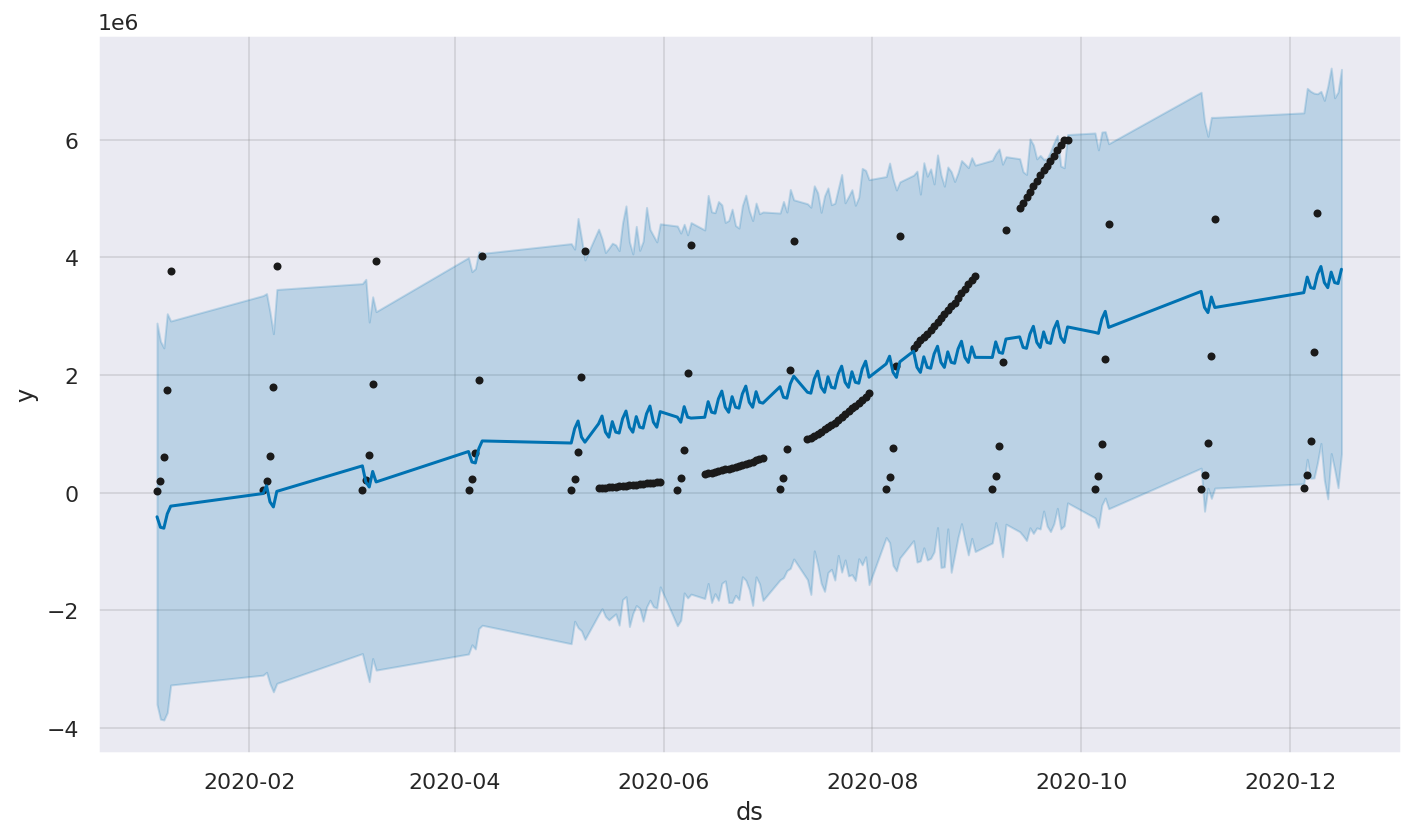

In [ ]:
confirmed_forecast_plot = m.plot(forecast)

**Forecasting Deaths using Prophet (Base model)**

Generating a week ahead forecast of confirmed cases of COVID-19 using the Machine Learning library – Prophet, with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors.

In [ ]:
#Forecasting Deaths using Prophet (Base model)
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
152,2020-12-12
153,2020-12-13
154,2020-12-14
155,2020-12-15
156,2020-12-16


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
152,2020-12-12,61738.635454,9642.637234,109992.455216
153,2020-12-13,65470.373409,17586.579166,117227.306229
154,2020-12-14,63285.470406,14753.132225,114107.699714
155,2020-12-15,63754.772478,10569.473000,111806.267404
156,2020-12-16,66865.565458,19453.305486,117014.480970


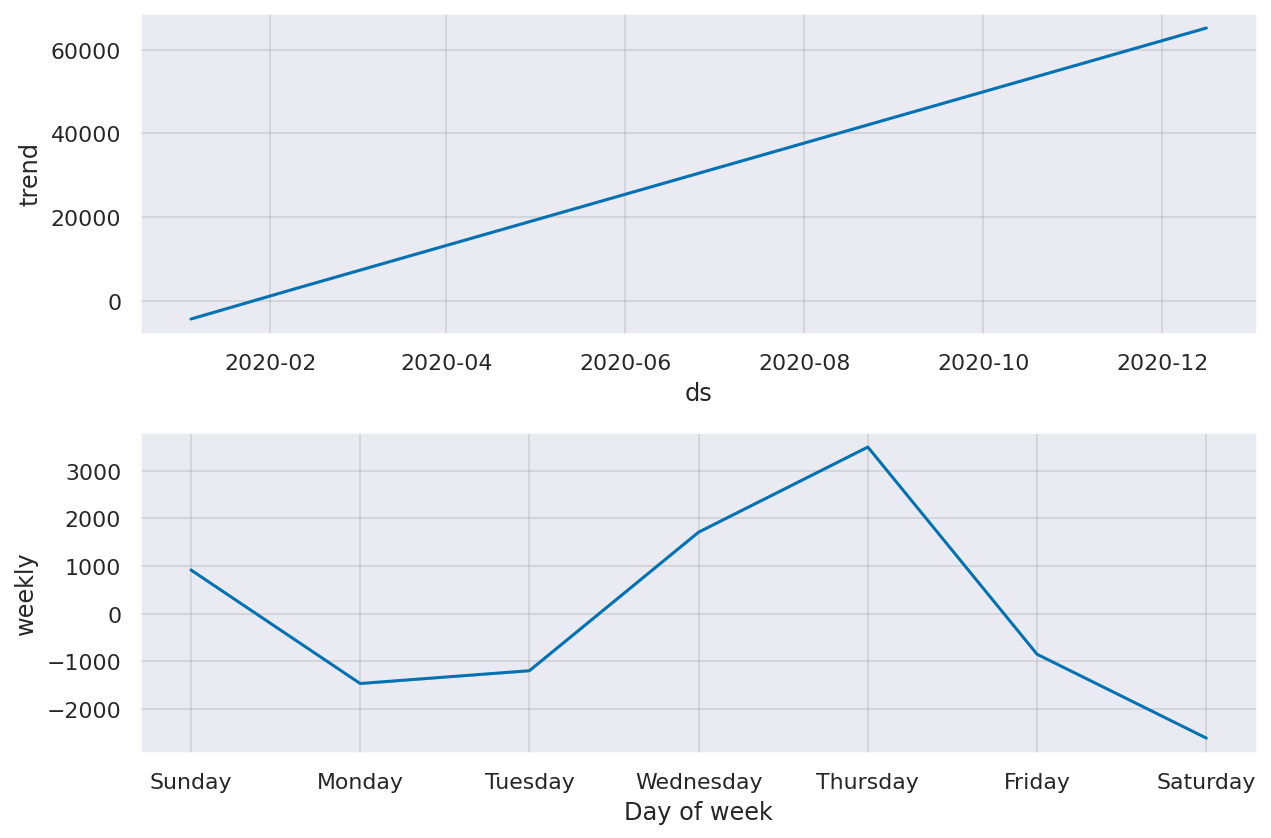

In [ ]:
deaths_forecast_plot = m.plot_components(forecast)

**Forecasting Recovered Cases with Prophet (Base model)**

Generating a week ahead forecast of confirmed cases of COVID-19 using Prophet, with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors.

In [ ]:
 #Forecasting Recovered Cases with Prophet (Base model)
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])
m = Prophet(interval_width=0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
152,2020-12-12
153,2020-12-13
154,2020-12-14
155,2020-12-15
156,2020-12-16


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
152,2020-12-12,2.653893e+06,44039.033624,5.258364e+06
153,2020-12-13,2.869111e+06,202192.277220,5.224183e+06
154,2020-12-14,2.717342e+06,171736.736908,5.347570e+06
155,2020-12-15,2.696296e+06,81891.907556,5.421312e+06
156,2020-12-16,2.889921e+06,279954.210873,5.323291e+06


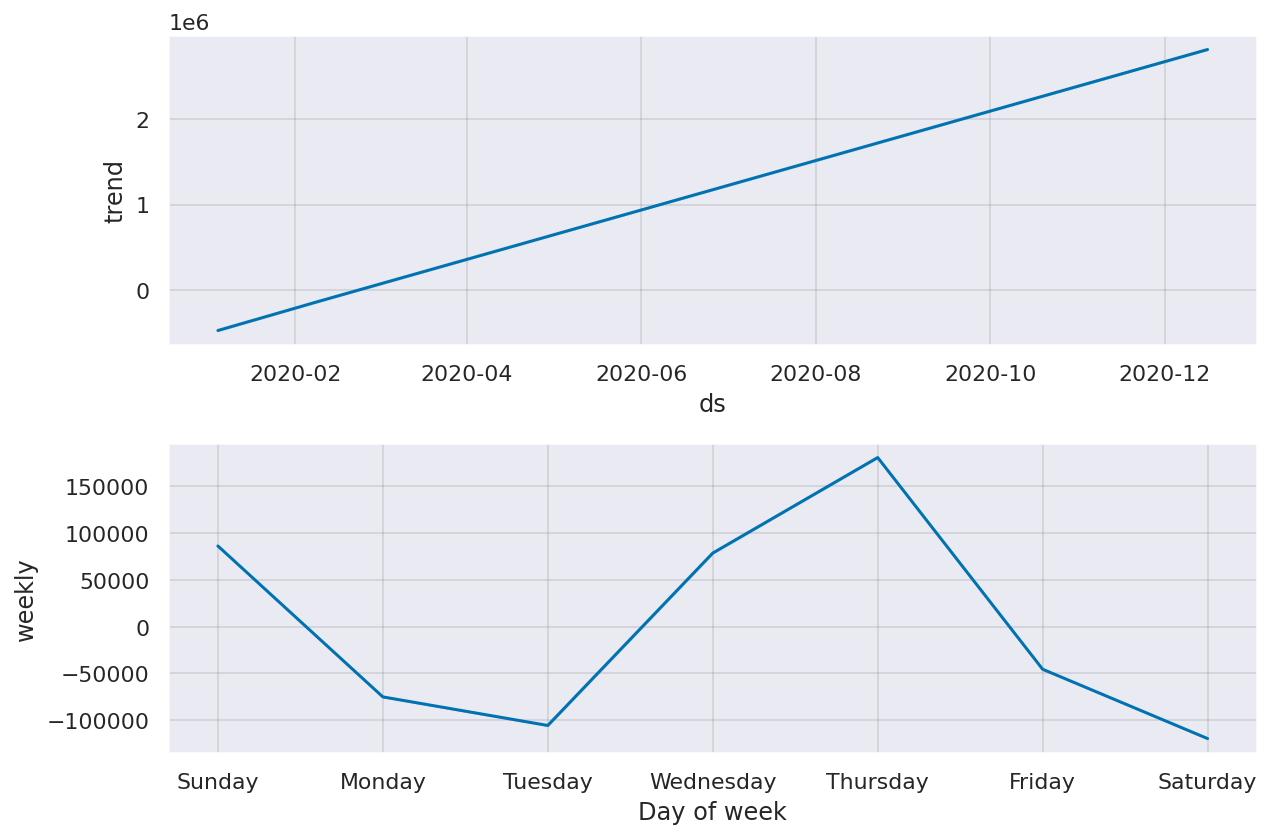

In [ ]:
recovered_forecast_plot = m.plot_components(forecast)

#Classification Models and Evaluation

In [ ]:
#1.a import the dataset
data1 = df4

In [ ]:
data1

,Date,Country,Confirmed,Recovered,Deaths
0,01-05-2020,India,37257,10007,1223
1,02-05-2020,India,39699,10819,1323
2,03-05-2020,India,42505,11775,1391
3,04-05-2020,India,46437,12847,1566
4,05-05-2020,India,49400,14142,1693
...,...,...,...,...,...
145,23-09-2020,India,5732518,4674987,91149
146,24-09-2020,India,5818570,4756164,92290
147,25-09-2020,India,5903932,4849584,93379
148,26-09-2020,India,5992532,4941627,94503


In [ ]:
data1 = pd.DataFrame(data1)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       150 non-null    object
 1   Country    150 non-null    object
 2   Confirmed  150 non-null    int64 
 3   Recovered  150 non-null    int64 
 4   Deaths     150 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.0+ KB


In [ ]:
#number of records and features in the dataset
data1.shape

(150, 5)

In [ ]:
#Check duplicate rows in data
duplicate_rows = data1[data1.duplicated()]
print("Number of duplicate rows :: ", duplicate_rows.shape)

Number of duplicate rows ::  (0, 5)


In [ ]:
#we have one duplicate row.
#Removing the duplicate row
data1 = data1.drop_duplicates()
duplicate_rows = data1[data1.duplicated()]
print("Number of duplicate rows :: ", duplicate_rows.shape)
#Number of duplicate rows after dropping one duplicate row

Number of duplicate rows ::  (0, 5)


In [ ]:
#Looking for null values
print("Null values :: ")
print(data1.isnull() .sum())

Null values :: 
Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64


In [ ]:
#Check if the other data is consistent
data1.shape

(150, 5)

In [ ]:
#Find the InterQuartile Range
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR = Q3-Q1
print('*********** InterQuartile Range ***********')
print(IQR)
# Remove the outliers using IQR
data2 = data1[~((data1<(Q1-1.5*IQR))|(data1>(Q3+1.5*IQR))).any(axis=1)]
data2.shape

*********** InterQuartile Range ***********
Confirmed    2698635.50
Recovered    2081509.50
Deaths         48284.25
dtype: float64


(150, 5)

Text(0.5, 1.0, 'Pearson Correlation')

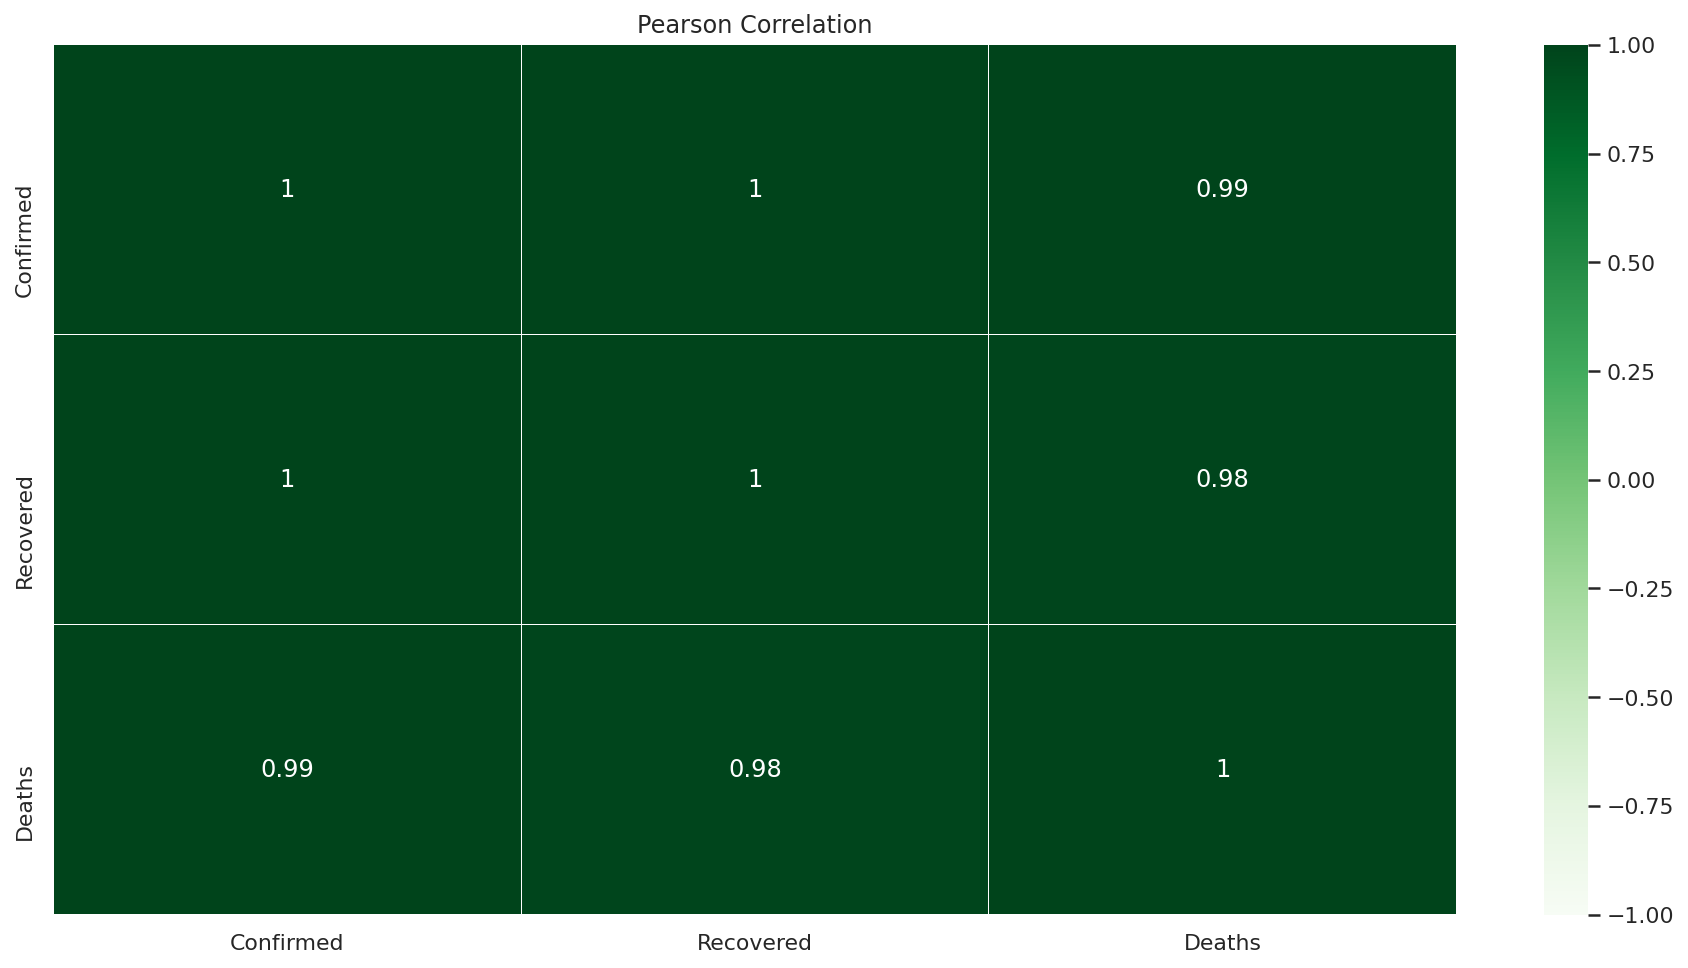

In [ ]:
#Pearson Correlation
#Finding the correlation between variables
pearsonCorr = data2.corr(method='pearson')
spearmanCorr = data2.corr(method='spearman')
fig = plt.subplots(figsize=(14,8))
sns.heatmap(pearsonCorr, vmin=-1,vmax=1, cmap = "Greens", annot=True, linewidth=0.1)
plt.title("Pearson Correlation")

Text(0.5, 1.0, 'Pearson Correlation')

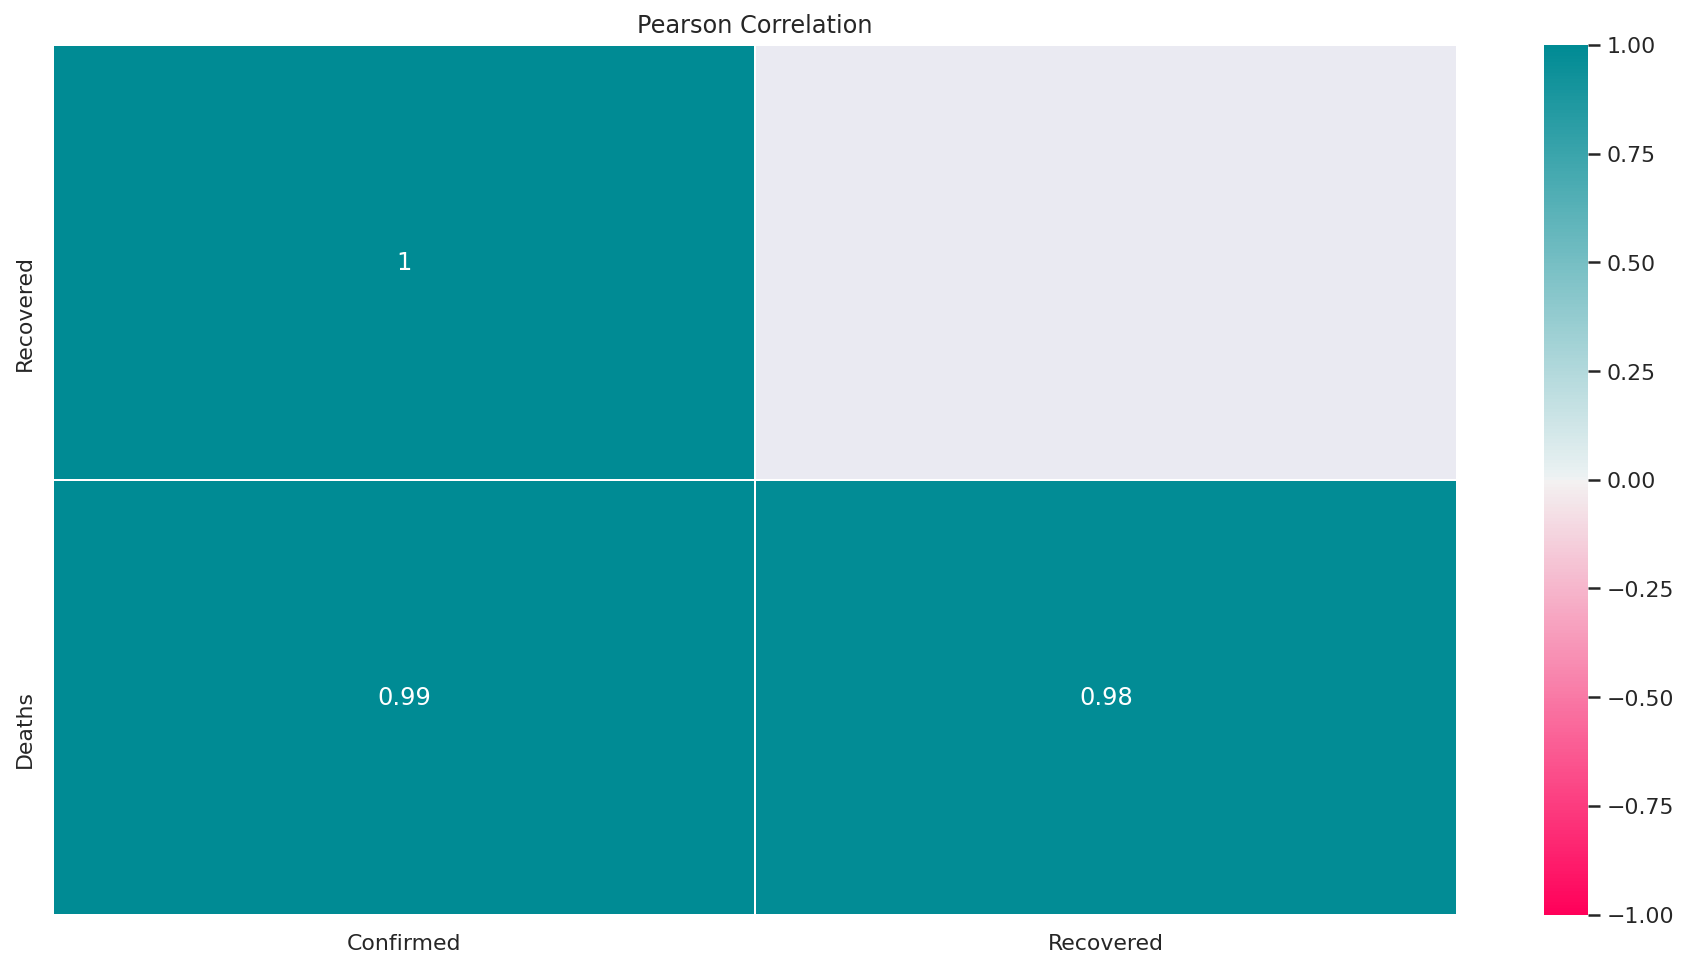

In [ ]:
#Create mask for both correlation matrices
#Pearson corr masking
#Generating mask for upper triangle
maskP = np.triu(np.ones_like(pearsonCorr,dtype=bool))
#Adjust mask and correlation
maskP = maskP[1:,:-1]
pCorr = pearsonCorr.iloc[1:,:-1].copy()
#Setting up a diverging palette
cmap = sns.diverging_palette(0, 200, 150, 50, as_cmap=True)
fig = plt.subplots(figsize=(14,8))
sns.heatmap(pCorr, vmin=-1,vmax=1, cmap = cmap, annot=True, linewidth=0.3, mask=maskP)
plt.title("Pearson Correlation")

Text(0.5, 1.0, 'Spearman Correlation')

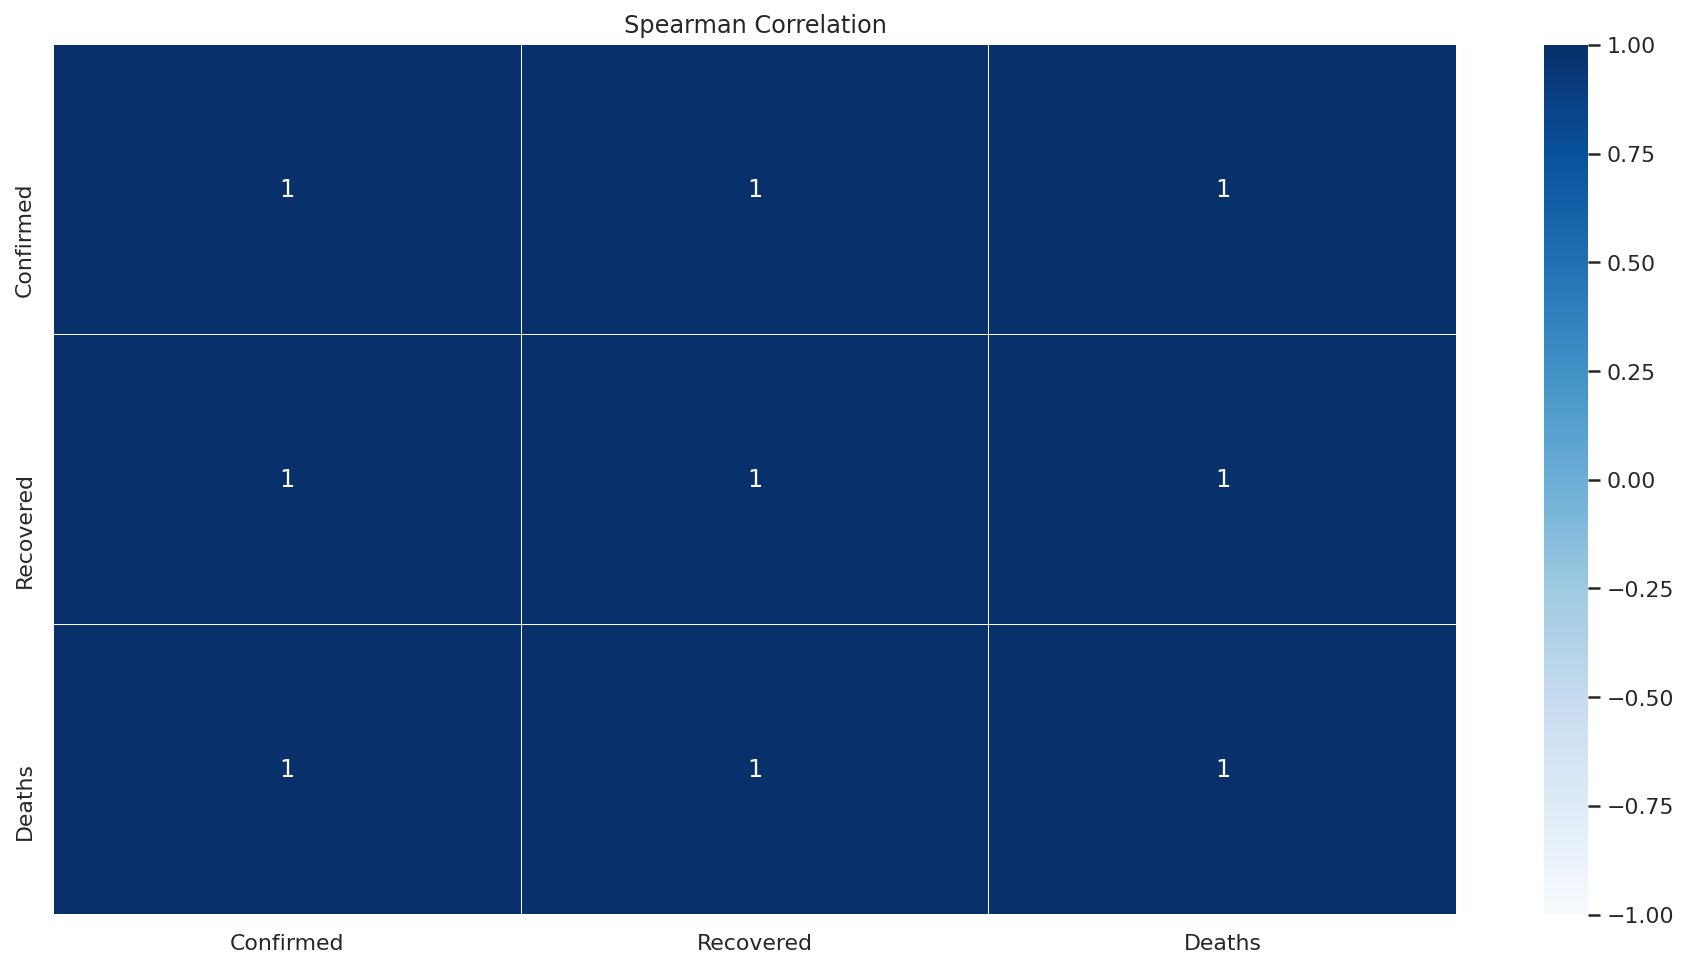

In [ ]:
#Spearman Correlation
fig = plt.subplots(figsize=(14,8))
sns.heatmap(spearmanCorr, vmin=-1,vmax=1, cmap = "Blues", annot=True, linewidth=0.1)
plt.title("Spearman Correlation")

Text(0.5, 1.0, 'Spearman Correlation')

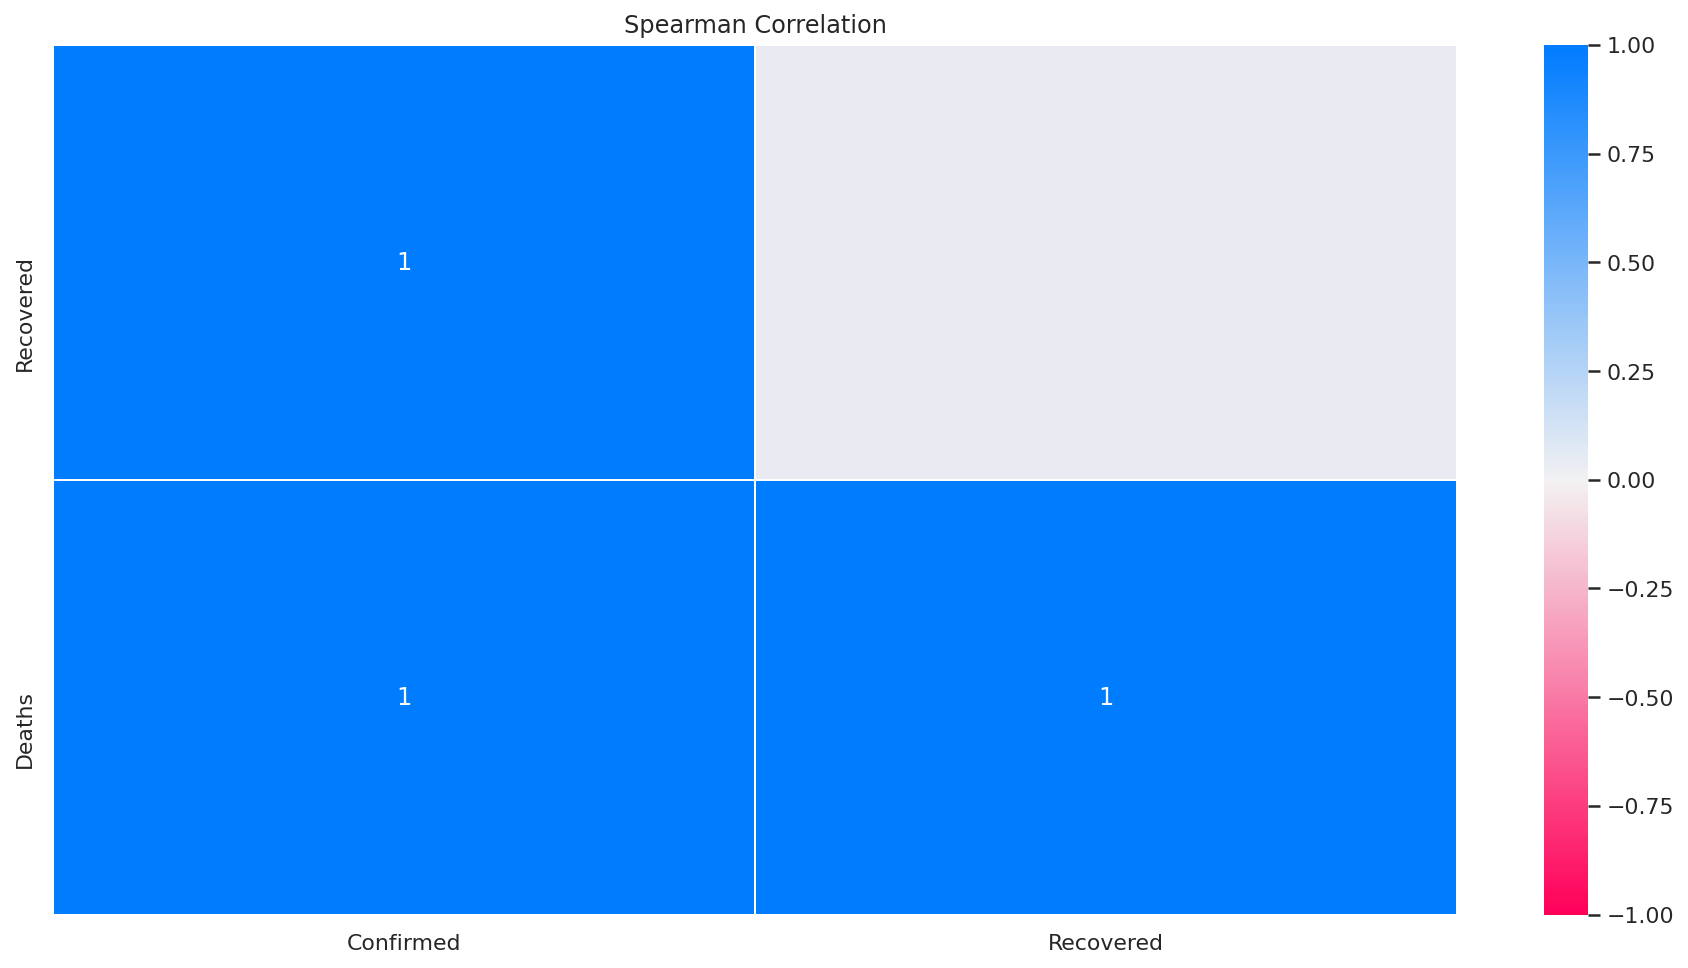

In [ ]:
#Create mask for both correlation matrices
#Spearson corr masking
#Generating mask for upper triangle
maskS = np.triu(np.ones_like(spearmanCorr,dtype=bool))
#Adjust mask and correlation
maskS = maskS[1:,:-1]
sCorr = spearmanCorr.iloc[1:,:-1].copy()
#Setting up a diverging palette
cmap = sns.diverging_palette(0, 250, 150, 50, as_cmap=True)
fig = plt.subplots(figsize=(14,8))
sns.heatmap(sCorr, vmin=-1,vmax=1, cmap = cmap, annot=True, linewidth=0.3, mask=maskS)
plt.title("Spearman Correlation")

#Classification

In [ ]:
data2 = data2.drop("Date",axis=1)
data2 = data2.drop("Country",axis=1)

In [ ]:
#From this we observe that the minimum correlation between output and other features in
#fbs,trtbps and chol
x = data2.drop("Deaths", axis=1)
y = data2["Deaths"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [ ]:
#Building classification models
names = ['Confirmed','Recovered','Deaths']
#   ****************Logistic Regression*****************
logReg = LogisticRegression(random_state=0, solver='liblinear')
logReg.fit(x_train, y_train)
#Check accuracy of Logistic Regression
y_pred_logReg = logReg.predict(x_test)

In [ ]:
#Model Accuracy
print("Accuracy of logistic regression classifier :: " ,metrics.accuracy_score(y_test,y_pred_logReg))
#Removing the features with low correlation and checking effect on accuracy of model
x_train1 = x_train.drop("Confirmed",axis=1)
x_test1 = x_test.drop("Confirmed", axis=1)
logReg1 = LogisticRegression(random_state=0, solver='liblinear').fit(x_train1,y_train)
y_pred_logReg1 = logReg1.predict(x_test1)
print("nAccuracy of logistic regression classifier after removing features:: " ,metrics.accuracy_score(y_test,y_pred_logReg1))

Accuracy of logistic regression classifier ::  0.0
nAccuracy of logistic regression classifier after removing features::  0.0


In [ ]:
# ***********************Decision Tree Classification***********************
decTree = DecisionTreeClassifier(max_depth=6, random_state=0)
decTree.fit(x_train,y_train)
y_pred_decTree = decTree.predict(x_test)
print("Accuracy of Decision Trees :: " , metrics.accuracy_score(y_test,y_pred_decTree))
#Remove features which have low correlation with output (fbs, trtbps, chol)
x_train_dt = x_train.drop("Confirmed",axis=1)
x_test_dt = x_test.drop("Confirmed", axis=1)
decTree1 = DecisionTreeClassifier(max_depth=6, random_state=0)
decTree1.fit(x_train_dt, y_train)
y_pred_dt1 = decTree1.predict(x_test_dt)
print("Accuracy of decision Tree after removing features:: ", metrics.accuracy_score(y_test,y_pred_dt1))

Accuracy of Decision Trees ::  0.0
Accuracy of decision Tree after removing features::  0.0


In [ ]:
# Using Random forest classifier
rf = RandomForestClassifier(n_estimators=500)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print("Accuracy of Random Forest Classifier :: ", metrics.accuracy_score(y_test, y_pred_rf))
#Find the score of each feature in model and drop the features with low scores
f_imp = rf.feature_importances_
for i,v in enumerate(f_imp):
    print('Feature: %s, Score: %.5f' % (names[i],v))

Accuracy of Random Forest Classifier ::  0.0
Feature: Confirmed, Score: 0.49936
Feature: Recovered, Score: 0.50064


In [ ]:
#K Neighbours Classifier
knc =  KNeighborsClassifier()
knc.fit(x_train,y_train)
y_pred_knc = knc.predict(x_test)
print("Accuracy of K-Neighbours classifier :: ", metrics.accuracy_score(y_test,y_pred_knc))

Accuracy of K-Neighbours classifier ::  0.0


In [ ]:
#Models and their accuracy
print("*****************Models and their accuracy*****************")
print("Logistic Regression Classifier :: ", metrics.accuracy_score(y_test,y_pred_logReg1))
print("Decision Tree :: ", metrics.accuracy_score(y_test,y_pred_dt1))
print("Random Forest Classifier :: ", metrics.accuracy_score(y_test, y_pred_rf))
print("K Neighbours Classifier :: ", metrics.accuracy_score(y_test,y_pred_knc))

*****************Models and their accuracy*****************
Logistic Regression Classifier ::  0.0
Decision Tree ::  0.0
Random Forest Classifier ::  0.0
K Neighbours Classifier ::  0.0


After implementing four classification models and comparing their accuracy, we can conclude that for this dataset Logistic Regression Classifier is the appropriate model to be used